In [5]:
import numpy as np
import torch
from matplotlib import pyplot as plt
import math

tensor([-3.1416, -2.4435, -1.7453, -1.0472, -0.3491,  0.3491,  1.0472,  1.7453,
         2.4435,  3.1416])
tensor([ 0.0343, -0.5488, -0.9319, -0.8052, -0.2730,  0.4137,  0.9304,  1.0016,
         0.7244,  0.0898])


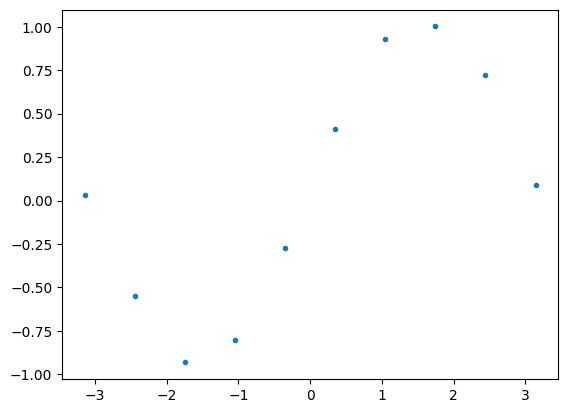

In [129]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 10)
y = torch.sin(x) + 0.1*torch.rand_like(x)
# print(x)
# print(y)
plt.plot(x,y,".")
plt.show()

In [127]:
degree = 6
p = torch.tensor(range(degree))
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(
    torch.nn.Linear(degree, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

for t in range(10000):

    y_pred = model(xx)

    loss = loss_fn(y_pred, y)
    if t % 1000 == 999:
        print(t+1, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



1000 19.085046768188477
2000 3.0258965492248535
3000 1.13008451461792
4000 0.8496495485305786
5000 0.8093655109405518
6000 0.803587019443512
7000 0.8027699589729309
8000 0.8026456832885742
9000 0.8026458024978638
10000 0.8026155233383179


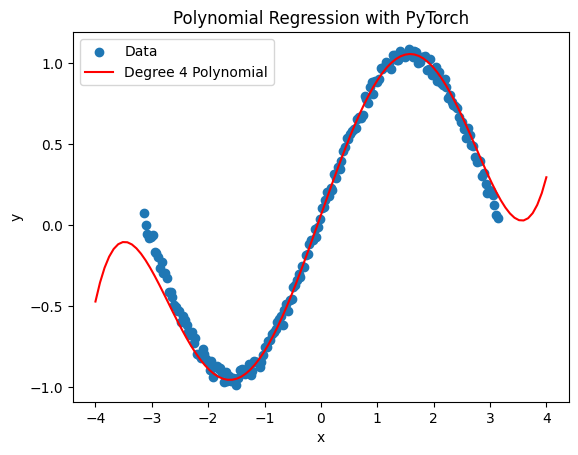

In [128]:
linear_layer = model[0]
weights = linear_layer.weight
# print(weights.unsqueeze(-1))
weights = linear_layer.weight
xt = torch.linspace(-4, 4, 100)
xxt = xt.unsqueeze(-1).pow(p)
# print(xxt@weights.unsqueeze(-1)+linear_layer.bias.item())
yt = xxt @ weights.unsqueeze(-1)+linear_layer.bias.item()
# print(yt.flatten())
# Plot the results
plt.scatter(x.numpy(), y.numpy(), label="Data")
plt.plot(xt.numpy(),yt.detach().numpy().flatten(), label=f"Degree 4 Polynomial", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression with PyTorch")
plt.legend()
plt.show()

In [130]:
rlx_data = '''
# relaxation from mean-field object using 250 walkers
# rlx_step       system1_en      system2_en      en_diff
    0            -15.922150      -15.901495      -0.020656
# relaxation time: 4.80
'''

prop_data = '''
# multiple independent post relaxation propagation with step size 0.01s
# correlated sampling
# tot_walkers: 250, propagation steps: 30, number of independent runs: 100
# step   system1_en      error           system2_en      error           energy_diff     error
  1      -15.921830      0.000003        -15.900985      0.000004        -0.020845       0.000003
  2      -15.921863      0.000009        -15.900885      0.000011        -0.020978       0.000008
  3      -15.922029      0.000014        -15.900983      0.000023        -0.021046       0.000019
  4      -15.922189      0.000028        -15.901091      0.000028        -0.021098       0.000027
  5      -15.922321      0.000033        -15.901191      0.000039        -0.021130       0.000027
  6      -15.922422      0.000041        -15.901239      0.000041        -0.021182       0.000028
  7      -15.922505      0.000039        -15.901323      0.000047        -0.021182       0.000036
  8      -15.922533      0.000035        -15.901305      0.000050        -0.021228       0.000036
  9      -15.922574      0.000037        -15.901278      0.000047        -0.021296       0.000033
  10     -15.922635      0.000041        -15.901320      0.000057        -0.021315       0.000043
  11     -15.922697      0.000039        -15.901522      0.000096        -0.021175       0.000095
  12     -15.922658      0.000042        -15.901439      0.000061        -0.021219       0.000059
  13     -15.922834      0.000105        -15.901604      0.000225        -0.021229       0.000135
  14     -15.922675      0.000051        -15.901371      0.000064        -0.021304       0.000051
  15     -15.922702      0.000058        -15.901369      0.000063        -0.021333       0.000065
  16     -15.922666      0.000037        -15.901395      0.000055        -0.021271       0.000051
  17     -15.922692      0.000048        -15.901343      0.000065        -0.021349       0.000062
  18     -15.922677      0.000051        -15.901421      0.000067        -0.021256       0.000059
  19     -15.922679      0.000059        -15.901420      0.000067        -0.021258       0.000072
  20     -15.922730      0.000058        -15.901401      0.000058        -0.021329       0.000062
  21     -15.922708      0.000055        -15.901441      0.000062        -0.021266       0.000059
  22     -15.922769      0.000061        -15.901471      0.000089        -0.021298       0.000077
  23     -15.922678      0.000050        -15.901344      0.000066        -0.021333       0.000060
  24     -15.922661      0.000042        -15.901333      0.000065        -0.021328       0.000061
  25     -15.922728      0.000043        -15.901498      0.000069        -0.021230       0.000068
  26     -15.922771      0.000052        -15.901455      0.000068        -0.021316       0.000075
  27     -15.922751      0.000053        -15.901525      0.000097        -0.021227       0.000097
  28     -15.922704      0.000044        -15.901387      0.000071        -0.021317       0.000074
  29     -15.922821      0.000077        -15.901430      0.000065        -0.021391       0.000095
  30     -15.922811      0.000066        -15.901435      0.000075        -0.021375       0.000077
# total run time: 360.91      
'''

rlx_en_diff = []
lines = rlx_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 3:
            rlx_en_diff.append(columns[3])

rlx_en_diff = np.array(rlx_en_diff,dtype='float32')

prop_en_diff = []
prop_en_diff_err = []
lines = prop_data.splitlines()
for line in lines:
    if not line.startswith("#"): 
        columns = line.split()
        if len(columns) > 5:
            prop_en_diff.append(columns[5])
        if len(columns) > 6:
            prop_en_diff_err.append(columns[6])

prop_en_diff = np.array(prop_en_diff,dtype='float32')
prop_en_diff_err = np.array(prop_en_diff_err,dtype='float32')

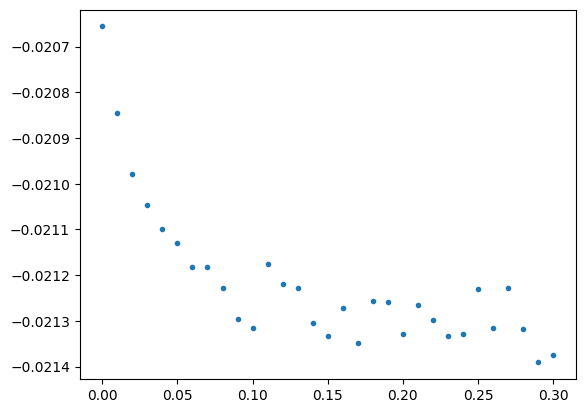

In [140]:
y_data = np.hstack((rlx_en_diff,prop_en_diff))
x_data = np.arange(len(y_data))*0.01
plt.plot(x_data,y_data,'.')
plt.show()


In [158]:
x = torch.from_numpy(x_data)
y = torch.from_numpy(y_data)
x = x.to(torch.float32)
y = y.to(torch.float32)
print(x)
print(y)

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000])
tensor([-0.0207, -0.0208, -0.0210, -0.0210, -0.0211, -0.0211, -0.0212, -0.0212,
        -0.0212, -0.0213, -0.0213, -0.0212, -0.0212, -0.0212, -0.0213, -0.0213,
        -0.0213, -0.0213, -0.0213, -0.0213, -0.0213, -0.0213, -0.0213, -0.0213,
        -0.0213, -0.0212, -0.0213, -0.0212, -0.0213, -0.0214, -0.0214])


In [173]:
degree = 6
p = torch.tensor(range(1,degree))
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(
    torch.nn.Linear(degree-1, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

for t in range(50000):

    y_pred = model(xx)

    loss = loss_fn(y_pred, y)
    if t % 1000 == 999:
        print(t+1, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


1000 0.0029424396343529224
2000 7.731980076641776e-06
3000 6.092126341172843e-07
4000 4.830036459679832e-07
5000 4.358220166977844e-07
6000 3.97328165036015e-07
7000 3.658727507627191e-07
8000 3.4020661132672103e-07
9000 3.1926333576848265e-07
10000 3.021882832854317e-07
11000 2.88243967361268e-07
12000 2.768499598460039e-07
13000 2.675649568573135e-07
14000 2.600006325792492e-07
15000 2.537387615575426e-07
16000 2.487226140601706e-07
17000 2.4452924662909936e-07
18000 2.410766057892033e-07
19000 2.3827179518320918e-07
20000 2.3596868459208054e-07
21000 2.3400441762078117e-07
22000 2.3244945168698905e-07
23000 2.3115102010251576e-07
24000 2.3004926674730086e-07
25000 2.2912558961252216e-07
26000 2.2835449442482059e-07
27000 2.2769218332996388e-07
28000 2.2710314340201876e-07
29000 2.2663499521513586e-07
30000 2.262130749386415e-07
31000 2.2581974690183415e-07
32000 2.2549707523467077e-07
33000 2.2520016784710606e-07
34000 2.2493922813282552e-07
35000 2.247223278573074e-07
36000 2.24457

In [168]:
linear_layer = model[0]
weights = linear_layer.weight
print(weights.unsqueeze(-1))

tensor([[[-0.1665],
         [-0.0048],
         [-0.0057],
         [ 0.1195],
         [-0.0428],
         [-0.4349],
         [-0.6817]]], grad_fn=<UnsqueezeBackward0>)


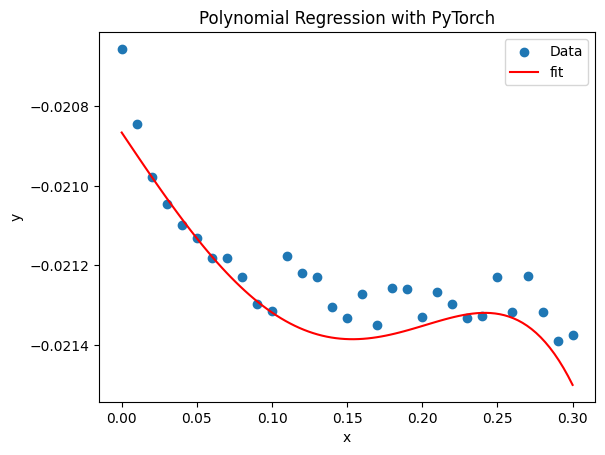

In [174]:
linear_layer = model[0]
weights = linear_layer.weight
# print(weights.unsqueeze(-1))
weights = linear_layer.weight
xt = torch.linspace(0, 0.3, 100)
xxt = xt.unsqueeze(-1).pow(p)
# print(xxt@weights.unsqueeze(-1)+linear_layer.bias.item())
yt = xxt @ weights.unsqueeze(-1)+linear_layer.bias.item()
# print(yt.flatten())
# Plot the results
plt.scatter(x.numpy(), y.numpy(), label="Data")
plt.plot(xt.numpy(),yt.detach().numpy().flatten(), label=f"fit", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression with PyTorch")
plt.legend()
plt.show()